In [6]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

generator = keras.models.load_model(
    'datas/weights/generatorcifar10sn.h5',
    custom_objects={'Addons>SpectralNormalization': tfa.layers.SpectralNormalization}
)

latent_dim = 100

number_of_samples = 500

image_noises = tf.random.normal([number_of_samples, latent_dim])
label_noises = tf.random.uniform([number_of_samples, ], minval=0, maxval=10, dtype=tf.int32)
example_images = generator((image_noises, label_noises), training=False)

normalized_samples = example_images.numpy()*127.5+127.5

np.save("generated_samples.npy", normalized_samples)

In [7]:
def plot_grid_of_images(images):
    plt.figure(figsize=(8, 8))

    for i in range(images.shape[0]):
        plt.subplot(8, 8, i+1)
        plt.imshow((images[i].numpy() * 127.5 + 127.5).astype("uint32"), interpolation="none")
        plt.axis('off')
    plt.show()

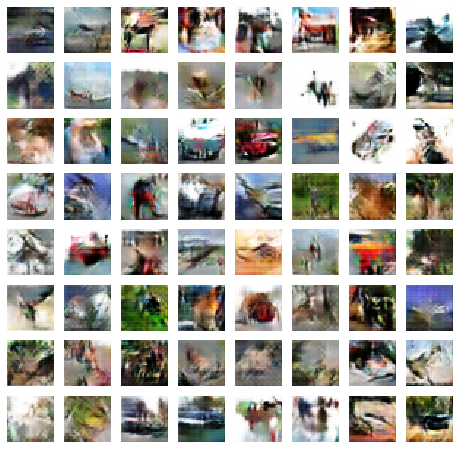

In [8]:
plot_grid_of_images(example_images[:64])